<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 154.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 166.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 103.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 148.8 MB/s eta 0:00:00


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


In [3]:
## Write your code here
df_one = df['ConvertedCompYearly'].value_counts()
print(df_one)

ConvertedCompYearly
64444.0     321
53703.0     308
75184.0     230
85925.0     226
107406.0    208
           ... 
9711.0        1
950000.0      1
51448.0       1
447569.0      1
4738.0        1
Name: count, Length: 6113, dtype: int64


Data type of ConvertedCompYearly: float64


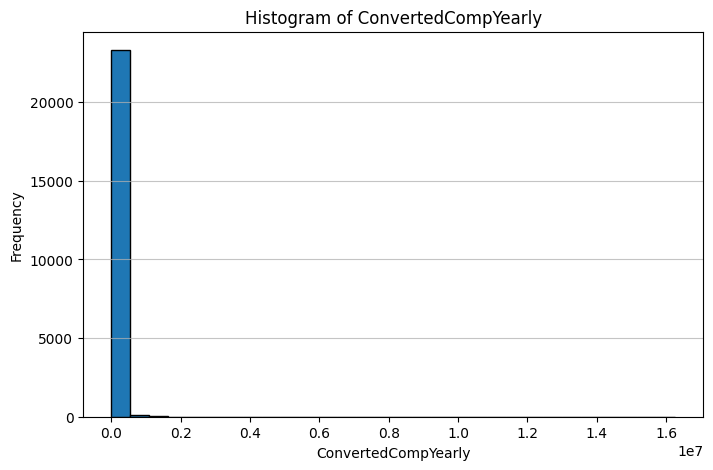

In [4]:
# 检查数据类型
print("Data type of ConvertedCompYearly:", df['ConvertedCompYearly'].dtype)

# 处理缺失值
df.dropna(subset=['ConvertedCompYearly'], inplace=True)

# 绘制直方图
plt.figure(figsize=(8, 5))
df['ConvertedCompYearly'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Histogram of ConvertedCompYearly')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [5]:
## Write your code here
Employed_full_time_data = df.loc[df['Employment'] == 'Employed, full-time']
print(Employed_full_time_data['ConvertedCompYearly'])

374       30074.0
379       91295.0
392      161044.0
395      121018.0
398      195000.0
           ...   
41174      9571.0
41178      9711.0
41180     44640.0
41184    170000.0
41185    116844.0
Name: ConvertedCompYearly, Length: 17586, dtype: float64


In [6]:
print(Employed_full_time_data['ConvertedCompYearly'].describe())

count    1.758600e+04
mean     8.892111e+04
std      1.311224e+05
min      1.000000e+00
25%      3.866600e+04
50%      6.981400e+04
75%      1.116902e+05
max      9.000000e+06
Name: ConvertedCompYearly, dtype: float64


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



In [7]:
print(df['ConvertedCompYearly'].describe())

count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


In [9]:
# 定义新的分组区间
bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 200000, 300000, float('inf')]

# 定义新的分组标签
labels = [
    '0-25k', '25k-50k', '50k-75k', '75k-100k', 
    '100k-125k', '125k-150k', '150k-200k', '200k-300k', '300k+'
]

# 使用 pd.cut() 进行分组
df['ConvertedCompYearly_Group'] = pd.cut(df['ConvertedCompYearly'], bins=bins, labels=labels, right=False)

# 查看分组后的统计信息
print(df['ConvertedCompYearly_Group'].value_counts())

ConvertedCompYearly_Group
0-25k        4628
50k-75k      4464
25k-50k      4110
75k-100k     3405
100k-125k    2264
150k-200k    1725
125k-150k    1356
200k-300k    1028
300k+         455
Name: count, dtype: int64


In [10]:
%matplotlib inline

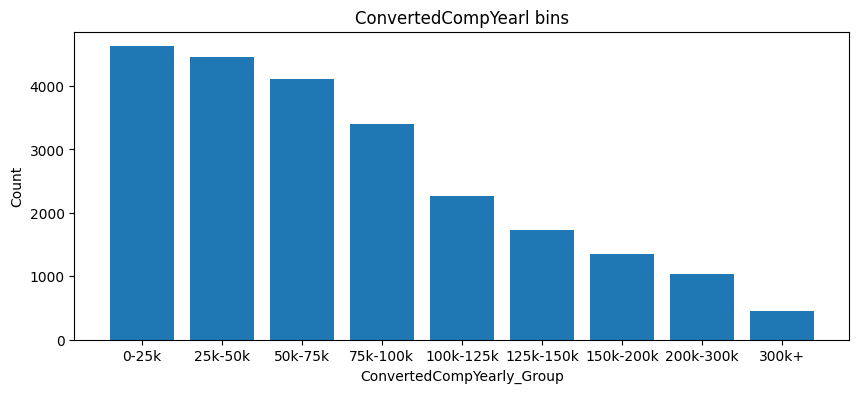

In [12]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(labels, df['ConvertedCompYearly_Group'].value_counts())

ax.set_xlabel("ConvertedCompYearly_Group")
ax.set_ylabel("Count")
ax.set_title("ConvertedCompYearl bins")

plt.show()

In [14]:
print(df['Country'].value_counts())

Country
United States of America                                4677
Germany                                                 2046
Ukraine                                                 1474
United Kingdom of Great Britain and Northern Ireland    1391
India                                                   1037
                                                        ... 
Brunei Darussalam                                          1
Burundi                                                    1
Barbados                                                   1
Mali                                                       1
Haiti                                                      1
Name: count, Length: 166, dtype: int64


In [19]:
# 筛选重要国家的数据
country_counts = df['Country'].value_counts()
important_countries = country_counts[country_counts >= 500].index

# 过滤出重要国家的数据
important_country_data = df[df['Country'].isin(important_countries)]

print(important_country_data['Country'].value_counts())

Country
United States of America                                4677
Germany                                                 2046
Ukraine                                                 1474
United Kingdom of Great Britain and Northern Ireland    1391
India                                                   1037
France                                                   918
Canada                                                   871
Brazil                                                   685
Poland                                                   586
Netherlands                                              561
Spain                                                    559
Italy                                                    540
Australia                                                510
Name: count, dtype: int64


In [20]:
print(important_country_data[['Country','ConvertedCompYearly_Group']].value_counts())

Country                   ConvertedCompYearly_Group
United States of America  150k-200k                    1147
                          100k-125k                     789
                          200k-300k                     763
Ukraine                   0-25k                         725
India                     0-25k                         655
                                                       ... 
Spain                     300k+                           2
India                     150k-200k                       1
                          125k-150k                       1
Poland                    300k+                           1
Italy                     300k+                           1
Name: count, Length: 117, dtype: int64


In [23]:
important_country_data['Country'].replace('United States of America','US',inplace = True)
important_country_data['Country'].replace('United Kingdom of Great Britain and Northern Ireland','UK',inplace = True)

/tmp/ipykernel_302/2738503436.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  important_country_data['Country'].replace('United States of America','US',inplace = True)
/tmp/ipykernel_302/2738503436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_country_data['Country'].replace('United States of America','US',inplace = True)
/

<Axes: xlabel='Country', ylabel='ConvertedCompYearly_Group'>

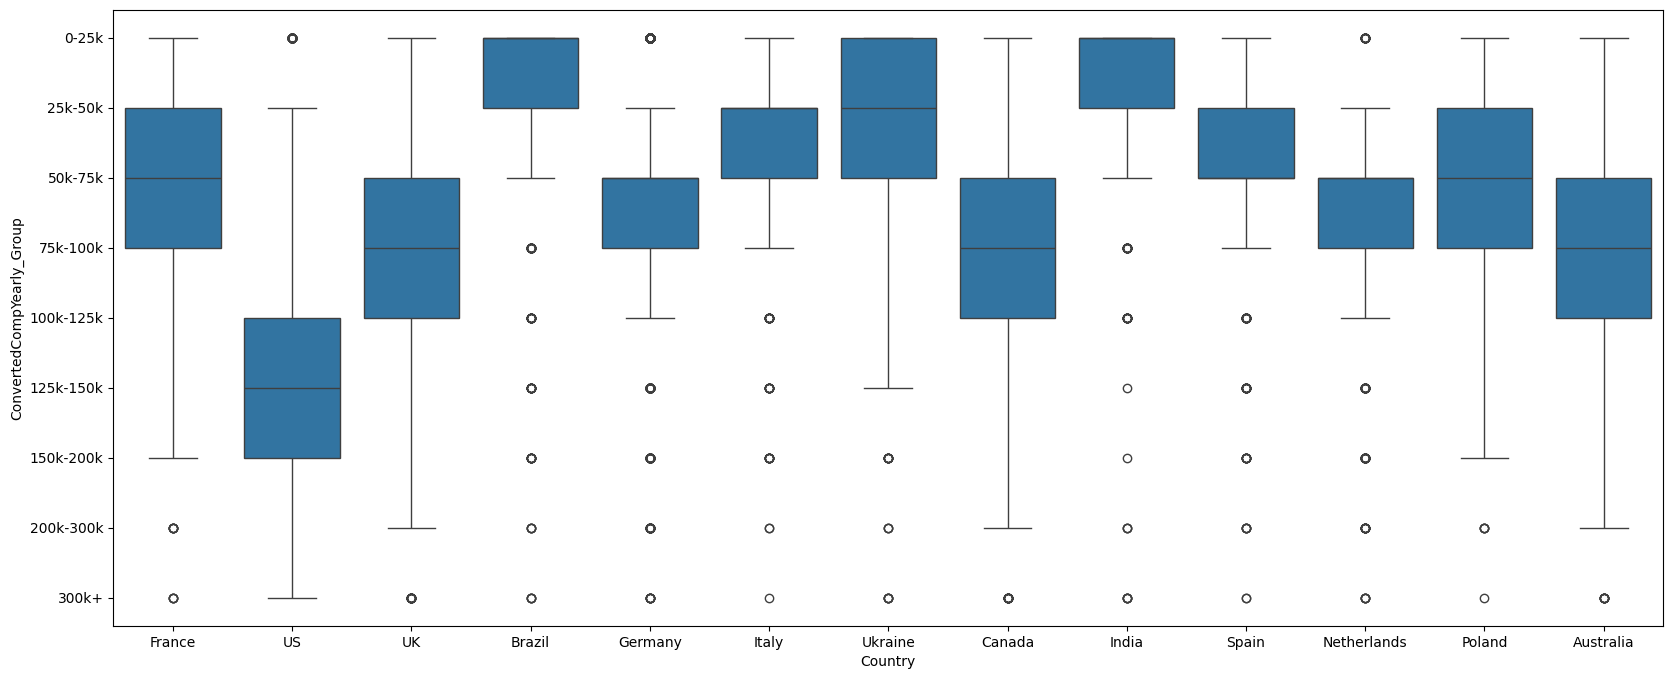

In [24]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.boxplot(x="Country", y="ConvertedCompYearly_Group", data=important_country_data)

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [27]:
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


In [28]:
df_no_outliers[["ConvertedCompYearly", "WorkExp","JobSatPoints_1"]].corr()

,ConvertedCompYearly,WorkExp,JobSatPoints_1
ConvertedCompYearly,1.000000,0.408438,-0.058170
WorkExp,0.408438,1.000000,-0.032388
JobSatPoints_1,-0.058170,-0.032388,1.000000


<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
